# **Dataset**

In [ ]:
import pandas as pd

file_path = "oscars.csv"
df = pd.read_csv(file_path, delimiter='\t')

## **Exploring the dataset:**

In [ ]:
df.head()

,Ceremony,Year,Class,CanonicalCategory,Category,NomId,Film,FilmId,Name,Nominees,NomineeIds,Winner,Detail,Note,Citation,MultifilmNomination
0,1,1927/28,Acting,ACTOR IN A LEADING ROLE,ACTOR,an0051251,The Noose,tt0019217,Richard Barthelmess,Richard Barthelmess,nm0001932,NaN,Nickie Elkins,NaN,NaN,True
1,1,1927/28,Acting,ACTOR IN A LEADING ROLE,ACTOR,an0051252,The Patent Leather Kid,tt0018253,Richard Barthelmess,Richard Barthelmess,nm0001932,NaN,The Patent Leather Kid,NaN,NaN,True
2,1,1927/28,Acting,ACTOR IN A LEADING ROLE,ACTOR,an0051250a,The Last Command,tt0019071,Emil Jannings,Emil Jannings,nm0417837,True,General Dolgorucki [Grand Duke Sergius Alexander],NaN,NaN,True
3,1,1927/28,Acting,ACTOR IN A LEADING ROLE,ACTOR,an0051250b,The Way of All Flesh,tt0019553,Emil Jannings,Emil Jannings,nm0417837,True,August Schilling,NaN,NaN,True
4,1,1927/28,Acting,ACTRESS IN A LEADING ROLE,ACTRESS,an0051255,A Ship Comes In,tt0018389,Louise Dresser,Louise Dresser,nm0237571,NaN,Mrs. Pleznik,NaN,NaN,NaN


In [ ]:
df.shape

(11996, 16)

In [ ]:
df.dtypes

Ceremony                int64
Year                   object
Class                  object
CanonicalCategory      object
Category               object
NomId                  object
Film                   object
FilmId                 object
Name                   object
Nominees               object
NomineeIds             object
Winner                 object
Detail                 object
Note                   object
Citation               object
MultifilmNomination    object
dtype: object

In [ ]:
df.columns

Index(['Ceremony', 'Year', 'Class', 'CanonicalCategory', 'Category', 'NomId',
       'Film', 'FilmId', 'Name', 'Nominees', 'NomineeIds', 'Winner', 'Detail',
       'Note', 'Citation', 'MultifilmNomination'],
      dtype='object')

In [ ]:
df.describe()

,Ceremony
count,11996.000000
mean,50.785929
std,27.480915
min,1.000000
25%,26.000000
50%,51.000000
75%,75.000000
max,97.000000


In [ ]:
df.isnull().sum()

Ceremony                   0
Year                       0
Class                      0
CanonicalCategory          0
Category                   0
NomId                    514
Film                    1243
FilmId                  1243
Name                    1169
Nominees                 353
NomineeIds               866
Winner                  8561
Detail                  8845
Note                   11394
Citation               10829
MultifilmNomination    11956
dtype: int64

In [ ]:
duplicates = df[df.duplicated(keep=False)]

## **Cleaning the dataset**

In [ ]:
# Handling missing values:

df['Winner'] = df['Winner'].fillna(False).astype(bool)
df['Film'] = df['Film'].fillna("Unknown")
df['FilmId'] = df['FilmId'].fillna("Unknown")
df['Name'] = df['Name'].fillna("Unknown")
df['NomineeIds'] = df['NomineeIds'].fillna("Unknown")
df['Nominees'] = df['Nominees'].fillna(df['Name'])

In [ ]:
# Dropping unnecessary columns
df = df.drop(columns=['Detail', 'Note', 'Citation', 'MultifilmNomination', 'Ceremony', 'Class', 'CanonicalCategory','Nominees'])

# Dropping rows where NomId is missing (since it's an identifier, we can't infer it)
df = df.dropna(subset=['NomId'])

In [ ]:
# Standardizing Data Types
df['Year'] = df['Year'].astype(str).str.split('/').str[0].astype(int)

# Converting fully capitalized words in 'category' to title case
df['Category'] = df['Category'].apply(lambda x: x.title() if x.isupper() else x)

# Stripping whitespace from text columns
text_columns = [ 'Category', 'NomId', 'Film', 'FilmId', 'Name', 'NomineeIds']
df[text_columns] = df[text_columns].apply(lambda x: x.str.strip())

In [ ]:
# Removing duplicates
df = df.drop_duplicates()

In [ ]:
# Normalize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [ ]:
# Define the categories of interest (case-insensitive matching)
# Define a dictionary to map category variations to standardized names
category_mapping = {
    "best picture": "Best Picture",
    "outstanding picture": "Best Picture",
    "outstanding production": "Best Picture",
    "best motion picture": "Best Picture",
    "actor in a leading role": "Best Actor",
    "actor": "Best Actor",
    "actress in a leading role": "Best Actress",
    "actress": "Best Actress",
    "actor in a supporting role": "Best Supporting Actor",
    "supporting actor": "Best Supporting Actor",
    "actress in a supporting role": "Best Supporting Actress",
    "supporting actress": "Best Supporting Actress",
    "directing": "Best Director",
    "directing (comedy picture)": "Best Director",
    "directing (dramatic picture)": "Best Director",
    "best director": "Best Director",
    "writing (original screenplay)": "Best Original Screenplay",
    "original screenplay": "Best Original Screenplay",
    "writing (screenplay--original)": "Best Original Screenplay",
    "writing (story and screenplay--written directly for the screen)": "Best Original Screenplay",
    "writing (screenplay written directly for the screen)": "Best Original Screenplay",
    "writing (screenplay written directly for the screen--based on factual material or on story material not previously published or produced)": "Best Original Screenplay",
    "writing (adapted screenplay)": "Best Adapted Screenplay",
    "writing (screenplay adapted from other material)": "Best Adapted Screenplay",
    "writing (screenplay--adapted)": "Best Adapted Screenplay",
    "writing (screenplay based on material from another medium)": "Best Adapted Screenplay",
    "writing (screenplay based on material previously produced or published)": "Best Adapted Screenplay",
    "cinematography": "Best Cinematography",
    "cinematography (black-and-white)": "Best Cinematography",
    "cinematography (color)": "Best Cinematography"
}

# Standardize category names in the dataset
df['category_standardized'] = df['category'].apply(lambda x: category_mapping.get(x.lower(), None) if isinstance(x, str) else None)

# Drop 'nomid' and 'nomineeid' columns
df.drop(columns=['nomid', 'nomineeids'], inplace=True, errors='ignore')

# Keep only rows that matched a relevant category
filtered_df = df.dropna(subset=['category_standardized'])

# Save the filtered dataset
filtered_file_path = "oscars_standardized.csv"
filtered_df.to_csv(filtered_file_path, index=False)

In [ ]:
# Load the dataset
file_path = "oscars_standardized.csv"
df = pd.read_csv(file_path)

# Replace the 'category' column with 'category_standardized'
df['category'] = df['category_standardized']

# Drop the now redundant 'category_standardized' column
df.drop(columns=['category_standardized'], inplace=True)

# Save the cleaned dataset
cleaned_file_path = "oscars_clean_1.csv"
df.to_csv(cleaned_file_path, index=False)

# Provide the cleaned file path for download
cleaned_file_path

'oscars_clean_1.csv'

# **Data after cleaning**

In [ ]:
df.head()

,year,category,film,filmid,name,winner
0,1927,Best Actor,The Noose,tt0019217,Richard Barthelmess,False
1,1927,Best Actor,The Patent Leather Kid,tt0018253,Richard Barthelmess,False
2,1927,Best Actor,The Last Command,tt0019071,Emil Jannings,True
3,1927,Best Actor,The Way of All Flesh,tt0019553,Emil Jannings,True
4,1927,Best Actress,A Ship Comes In,tt0018389,Louise Dresser,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4168 entries, 0 to 4167
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      4168 non-null   int64 
 1   category  4168 non-null   object
 2   film      4168 non-null   object
 3   filmid    4168 non-null   object
 4   name      4168 non-null   object
 5   winner    4168 non-null   bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 167.0+ KB


In [ ]:
df.shape

(4168, 6)

In [ ]:
df.describe()

,year
count,4168.000000
mean,1978.562380
std,27.650584
min,1927.000000
25%,1955.000000
50%,1980.000000
75%,2003.000000
max,2024.000000


In [ ]:
df.dtypes

year         int64
category    object
film        object
filmid      object
name        object
winner        bool
dtype: object

# **TMDb API**

In [ ]:
import requests
import pandas as pd
import time

TMDB_API_KEY = "0c2cf3ce66cd4072df3d2a7e0bde934f"

TMDB_BASE_URL = "https://api.themoviedb.org/3/find/"

# Function to fetch movie details from TMDb using IMDb ID
def fetch_tmdb_data(imdb_id):
    url = f"{TMDB_BASE_URL}{imdb_id}"
    params = {
        "api_key": TMDB_API_KEY,
        "external_source": "imdb_id"
    }

    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()

        if data.get("movie_results"):
            movie = data["movie_results"][0]
            return {
                "tmdb_id": movie.get("id"),
                "popularity": movie.get("popularity"),
                "vote_count": movie.get("vote_count"),
                "vote_average": movie.get("vote_average"),
            }

    return {
        "tmdb_id": None,
        "popularity": None,
        "vote_count": None,
        "vote_average": None
    }


In [ ]:
file_path = "oscars_clean_1.csv"
df = pd.read_csv(file_path)

# Add new columns to store TMDb data
df["tmdb_id"] = None
df["popularity"] = None
df["vote_count"] = None
df["vote_average"] = None

# Fetch TMDb data for each row
for index, row in df.iterrows():
    if pd.notna(row["filmid"]):  # Check if IMDb ID is present
        tmdb_data = fetch_tmdb_data(row["filmid"])
        df.at[index, "tmdb_id"] = tmdb_data["tmdb_id"]
        df.at[index, "popularity"] = tmdb_data["popularity"]
        df.at[index, "vote_count"] = tmdb_data["vote_count"]
        df.at[index, "vote_average"] = tmdb_data["vote_average"]

    time.sleep(0.5)

# Saving the updated dataset
tmdb_df.to_csv("oscars_with_tmdb.csv", index=False)

# **Exploring the IMDb dataset**

In [ ]:
tmdb_df = pd.read_csv("oscars_with_tmdb.csv")
tmdb_df.head()

,year,category,film,filmid,name,winner,tmdb_id,popularity,vote_count,vote_average
0,1927,Best Actor,The Noose,tt0019217,Richard Barthelmess,False,113167,0.894,1,7.000
1,1927,Best Actor,The Patent Leather Kid,tt0018253,Richard Barthelmess,False,102541,1.557,11,6.182
2,1927,Best Actor,The Last Command,tt0019071,Emil Jannings,True,52679,5.954,84,7.300
3,1927,Best Actor,The Way of All Flesh,tt0019553,Emil Jannings,True,85499,1.397,6,6.900
4,1927,Best Actress,A Ship Comes In,tt0018389,Louise Dresser,False,104212,0.995,8,5.813


In [ ]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4168 entries, 0 to 4167
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          4168 non-null   int64  
 1   category      4168 non-null   object 
 2   film          4168 non-null   object 
 3   filmid        4168 non-null   object 
 4   name          4168 non-null   object 
 5   winner        4168 non-null   bool   
 6   tmdb_id       4168 non-null   int64  
 7   popularity    4168 non-null   float64
 8   vote_count    4168 non-null   int64  
 9   vote_average  4168 non-null   float64
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 297.3+ KB


In [ ]:
tmdb_df.shape

(4168, 10)

In [ ]:
tmdb_df.describe()

,year,tmdb_id,popularity,vote_count,vote_average
count,4168.000000,4.168000e+03,4168.000000,4168.000000,4168.000000
mean,1978.562380,8.820572e+04,27.064698,2781.202015,7.121955
std,27.650584,1.829269e+05,71.280210,4910.699146,0.663743
min,1927.000000,1.100000e+01,0.263000,1.000000,2.000000
25%,1955.000000,3.083000e+03,8.603000,137.000000,6.700000
50%,1980.000000,1.808950e+04,14.168500,687.000000,7.167500
75%,2003.000000,5.285900e+04,24.720000,3005.000000,7.562000
max,2024.000000,1.211472e+06,1520.298000,36973.000000,8.708000


In [ ]:
tmdb_df.dtypes

year              int64
category         object
film             object
filmid           object
name             object
winner             bool
tmdb_id           int64
popularity      float64
vote_count        int64
vote_average    float64
dtype: object

# **OMDb API**

In [ ]:
import pandas as pd
import requests
import time
import numpy as np
import concurrent.futures

# Load dataset
df = pd.read_csv("oscars_clean_1.csv")

# OMDb API keys
api_keys = ["4060e300", "4525a990", "a7a585dd", "954c1ba4"]

# Add missing columns
for col in ["Genre", "Director", "IMDb_Rating"]:
    if col not in df.columns:
        df[col] = None

# Split dataset into 4 parts for parallel fetching
df_split = np.array_split(df, 4)

# Function to fetch data from OMDb
def fetch_omdb_data(row, api_key):
    url = f"http://www.omdbapi.com/?i={row['filmid']}&apikey={api_key}"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        if data.get("Response") == "True":
            return {
                "Genre": data.get("Genre", None),
                "Director": data.get("Director", None),
                "IMDb_Rating": data.get("imdbRating", None)
            }
    return {"Genre": None, "Director": None, "IMDb_Rating": None}

# Function to process a dataset chunk with a specific API key
def process_chunk(df_chunk, api_key):
    for index, row in df_chunk.iterrows():
        if pd.isnull(row["Genre"]) or pd.isnull(row["Director"]) or pd.isnull(row["IMDb_Rating"]):
            fetched_data = fetch_omdb_data(row, api_key)
            df_chunk.at[index, "Genre"] = fetched_data["Genre"]
            df_chunk.at[index, "Director"] = fetched_data["Director"]
            df_chunk.at[index, "IMDb_Rating"] = fetched_data["IMDb_Rating"]
            time.sleep(0.5)  # Delay to prevent rate limits
    return df_chunk

# Run parallel fetching using multiple API keys
with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    results = executor.map(process_chunk, df_split, api_keys)

# Combine the results back into a single DataFrame
df_updated = pd.concat(results, ignore_index=True)

# Save the updated dataset
df_updated.to_csv("omdb_data.csv", index=False)

print("Updated dataset saved as 'oscars_updated.csv'")

# **Exploring the OMDb dataset:**

In [ ]:
omdb_df = pd.read_csv("omdb_data.csv")
omdb_df.head()

,year,category,film,filmid,name,winner,Genre,Director,IMDb_Rating
0,1927,Best Actor,The Noose,tt0019217,Richard Barthelmess,False,Drama,John Francis Dillon,7.0
1,1927,Best Actor,The Patent Leather Kid,tt0018253,Richard Barthelmess,False,"Drama, Romance, Sport",Alfred Santell,6.1
2,1927,Best Actor,The Last Command,tt0019071,Emil Jannings,True,"Drama, Romance, War",Josef von Sternberg,7.9
3,1927,Best Actor,The Way of All Flesh,tt0019553,Emil Jannings,True,Drama,Victor Fleming,6.8
4,1927,Best Actress,A Ship Comes In,tt0018389,Louise Dresser,False,Drama,William K. Howard,5.5


In [ ]:
omdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4168 entries, 0 to 4167
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         4168 non-null   int64  
 1   category     4168 non-null   object 
 2   film         4168 non-null   object 
 3   filmid       4168 non-null   object 
 4   name         4168 non-null   object 
 5   winner       4168 non-null   bool   
 6   Genre        3126 non-null   object 
 7   Director     3125 non-null   object 
 8   IMDb_Rating  3123 non-null   float64
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 264.7+ KB


In [ ]:
omdb_df.shape

(4168, 9)

In [ ]:
omdb_df.describe()

,year,IMDb_Rating
count,4168.000000,3123.000000
mean,1978.562380,7.410631
std,27.650584,0.603435
min,1927.000000,4.600000
25%,1955.000000,7.100000
50%,1980.000000,7.400000
75%,2003.000000,7.800000
max,2024.000000,9.300000


In [ ]:
omdb_df.dtypes

year             int64
category        object
film            object
filmid          object
name            object
winner            bool
Genre           object
Director        object
IMDb_Rating    float64
dtype: object

# **Combining both the datasets:**

In [ ]:
tmdb_df = pd.read_csv("oscars_with_tmdb.csv")
omdb_df = pd.read_csv("omdb_data.csv")

# Merge on 'filmid' (IMDb ID)
merged_df = tmdb_df.merge(omdb_df, on="filmid", how="left")

# Save merged dataset
merged_file_path = "oscars_with_tmdb_omdb.csv"
merged_df.to_csv(merged_file_path, index=False)

## **Exploring the merged dataset**

In [ ]:
merged_df = pd.read_csv("oscars_with_tmdb_omdb.csv")
merged_df.head()

,year_x,category_x,film_x,filmid,name_x,winner_x,tmdb_id,popularity,vote_count,vote_average,year_y,category_y,film_y,name_y,winner_y,Genre,Director,IMDb_Rating
0,1927,Best Actor,The Noose,tt0019217,Richard Barthelmess,False,113167,0.894,1,7.000,1927,Best Actor,The Noose,Richard Barthelmess,False,Drama,John Francis Dillon,7.0
1,1927,Best Actor,The Patent Leather Kid,tt0018253,Richard Barthelmess,False,102541,1.557,11,6.182,1927,Best Actor,The Patent Leather Kid,Richard Barthelmess,False,"Drama, Romance, Sport",Alfred Santell,6.1
2,1927,Best Actor,The Last Command,tt0019071,Emil Jannings,True,52679,5.954,84,7.300,1927,Best Actor,The Last Command,Emil Jannings,True,"Drama, Romance, War",Josef von Sternberg,7.9
3,1927,Best Actor,The Way of All Flesh,tt0019553,Emil Jannings,True,85499,1.397,6,6.900,1927,Best Actor,The Way of All Flesh,Emil Jannings,True,Drama,Victor Fleming,6.8
4,1927,Best Actress,A Ship Comes In,tt0018389,Louise Dresser,False,104212,0.995,8,5.813,1927,Best Actress,A Ship Comes In,Louise Dresser,False,Drama,William K. Howard,5.5


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14530 entries, 0 to 14529
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year_x        14530 non-null  int64  
 1   category_x    14530 non-null  object 
 2   film_x        14530 non-null  object 
 3   filmid        14530 non-null  object 
 4   name_x        14530 non-null  object 
 5   winner_x      14530 non-null  bool   
 6   tmdb_id       14530 non-null  int64  
 7   popularity    14530 non-null  float64
 8   vote_count    14530 non-null  int64  
 9   vote_average  14530 non-null  float64
 10  year_y        14530 non-null  int64  
 11  category_y    14530 non-null  object 
 12  film_y        14530 non-null  object 
 13  name_y        14530 non-null  object 
 14  winner_y      14530 non-null  bool   
 15  Genre         10749 non-null  object 
 16  Director      10748 non-null  object 
 17  IMDb_Rating   10740 non-null  float64
dtypes: bool(2), float64(3), in

In [ ]:
merged_df.shape

(14530, 18)

In [ ]:
merged_df.describe()

,year_x,tmdb_id,popularity,vote_count,vote_average,year_y,IMDb_Rating
count,14530.000000,1.453000e+04,14530.000000,14530.000000,14530.000000,14530.000000,10740.000000
mean,1981.325052,9.275579e+04,31.022847,3386.021060,7.264549,1981.325052,7.542691
std,26.817444,1.939457e+05,71.083027,5258.903537,0.612222,26.817444,0.549194
min,1927.000000,1.100000e+01,0.263000,1.000000,2.000000,1927.000000,4.600000
25%,1959.000000,1.715000e+03,10.236000,257.000000,6.900000,1959.000000,7.200000
50%,1982.000000,1.384700e+04,17.871000,1214.000000,7.300000,1982.000000,7.600000
75%,2005.000000,4.526900e+04,29.017000,3843.000000,7.700000,2005.000000,7.900000
max,2024.000000,1.211472e+06,1520.298000,36973.000000,8.708000,2024.000000,9.300000


In [ ]:
merged_df.dtypes

year_x            int64
category_x       object
film_x           object
filmid           object
name_x           object
winner_x           bool
tmdb_id           int64
popularity      float64
vote_count        int64
vote_average    float64
year_y            int64
category_y       object
film_y           object
name_y           object
winner_y           bool
Genre            object
Director         object
IMDb_Rating     float64
dtype: object

# **Cleaning the merged dataset**

In [ ]:
import pandas as pd

file_path = "oscars_with_tmdb_omdb.csv"
df = pd.read_csv(file_path)

# duplicate rows
df = df.drop_duplicates()

# Removing redundant columns (e.g., duplicate year, category, film, name, winner)
df = df.drop(columns=['year_y', 'category_y', 'film_y', 'name_y', 'winner_y'])

# Renaming columns to more meaningful names
df = df.rename(columns={
    'year_x': 'Year',
    'category_x': 'Category',
    'film_x': 'Film',
    'filmid': 'Film_ID',
    'name_x': 'Nominee',
    'winner_x': 'Winner',
    'tmdb_id': 'TMDb_ID',
    'popularity': 'Popularity',
    'vote_count': 'Vote_Count',
    'vote_average': 'Vote_Average',
    'Genre': 'Genres',
    'Director': 'Director',
    'IMDb_Rating': 'IMDb_Rating'
})

# Filling missing genres with 'Unknown'
df['Genres'] = df['Genres'].fillna('Unknown')

# Filling missing director values with 'Unknown'
df['Director'] = df['Director'].fillna('Unknown')

# Filling missing IMDb ratings with the mean IMDb rating
df['IMDb_Rating'] = df['IMDb_Rating'].fillna(df['IMDb_Rating'].mean())

cleaned_file_path = "cleaned_oscars_dataset.csv"
df.to_csv(cleaned_file_path, index=False)

In [ ]:
df_cleaned = pd.read_csv("cleaned_oscars_dataset.csv")

# Drop duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Verify that duplicates are removed
duplicate_count_after = df_cleaned.duplicated().sum()

# Save the re-cleaned dataset
cleaned_file_path_final = "final_cleaned_oscars.csv"
df_cleaned.to_csv(cleaned_file_path_final, index=False)

# Display the final duplicate count after cleaning
duplicate_count_after, cleaned_file_path_final

(0, 'final_cleaned_oscars.csv')

# **Exploring the Final dataset**

In [ ]:
import pandas as pd

cleaned_df = pd.read_csv("final_cleaned_oscars.csv")
cleaned_df.head()

,Year,Category,Film,Film_ID,Nominee,Winner,TMDb_ID,Popularity,Vote_Count,Vote_Average,Genres,Director,IMDb_Rating
0,1972,Best Cinematography,1776,tt0068156,"Harry Stradling, Jr.",False,14902,6.822,75,6.8,"Drama, History, Musical",Peter H. Hunt,7.2
1,2019,Best Cinematography,1917,tt8579674,Roger Deakins,True,530915,45.996,12542,8.0,"Action, Drama, War",Sam Mendes,8.2
2,2019,Best Director,1917,tt8579674,Sam Mendes,False,530915,45.996,12542,8.0,"Action, Drama, War",Sam Mendes,8.2
3,2019,Best Picture,1917,tt8579674,"Sam Mendes, Pippa Harris, Jayne-Ann Tenggren a...",False,530915,45.996,12542,8.0,"Action, Drama, War",Sam Mendes,8.2
4,2019,Best Original Screenplay,1917,tt8579674,Written by Sam Mendes & Krysty Wilson-Cairns,False,530915,45.996,12542,8.0,"Action, Drama, War",Sam Mendes,8.2


In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4118 entries, 0 to 4117
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          4118 non-null   int64  
 1   Category      4118 non-null   object 
 2   Film          4118 non-null   object 
 3   Film_ID       4118 non-null   object 
 4   Nominee       4118 non-null   object 
 5   Winner        4118 non-null   bool   
 6   TMDb_ID       4118 non-null   int64  
 7   Popularity    4118 non-null   float64
 8   Vote_Count    4118 non-null   int64  
 9   Vote_Average  4118 non-null   float64
 10  Genres        4118 non-null   object 
 11  Director      4118 non-null   object 
 12  IMDb_Rating   4118 non-null   float64
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 390.2+ KB


In [ ]:
cleaned_df.shape

(4118, 13)

In [ ]:
cleaned_df.describe()

,Year,TMDb_ID,Popularity,Vote_Count,Vote_Average,IMDb_Rating
count,4118.000000,4.118000e+03,4118.000000,4118.000000,4118.000000,4118.000000
mean,1978.720981,8.898767e+04,27.238960,2801.691841,7.121164,7.426889
std,27.746959,1.838814e+05,71.689654,4934.059010,0.664544,0.601777
min,1927.000000,1.100000e+01,0.263000,1.000000,2.000000,4.600000
25%,1955.000000,3.083000e+03,8.639000,137.000000,6.700000,7.100000
50%,1980.000000,1.816300e+04,14.316000,693.500000,7.164000,7.500000
75%,2003.000000,5.314900e+04,24.843000,3012.500000,7.564250,7.800000
max,2024.000000,1.211472e+06,1520.298000,36973.000000,8.708000,9.300000


In [ ]:
cleaned_df.dtypes

,0
Year,int64
Category,object
Film,object
Film_ID,object
Nominee,object
Winner,bool
TMDb_ID,int64
Popularity,float64
Vote_Count,int64
Vote_Average,float64


In [ ]:
df['Genres'] = df['Genres'].str.split(',').apply(lambda x: [genre.strip() for genre in x] if isinstance(x, list) else x)

genre_counts = df[df['Winner'] == True]['Genres'].explode().value_counts()

df.to_csv('final_cleaned.csv', index=False)

In [ ]:
genre_counts.head(10)

,count
Genres,
Drama,726
Romance,234
Comedy,162
Biography,160
Crime,110
War,78
Adventure,76
History,75
Thriller,59


# **Visualizations**

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

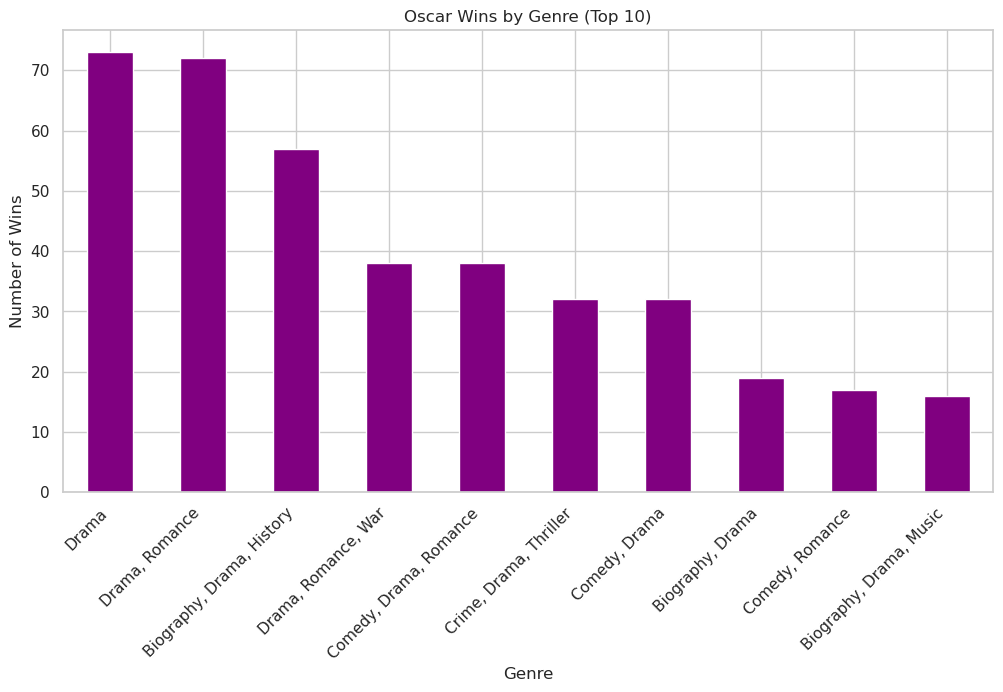

In [17]:
#1. Oscar Wins by Genre (Top 10)

plt.figure(figsize=(12, 6))
genre_counts = df[df['Winner'] == True]['Genres'].explode().value_counts().head(10)
genre_counts.plot(kind='bar', color='purple')
plt.title("Oscar Wins by Genre (Top 10)")
plt.xlabel("Genre")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45, ha="right")
plt.show()

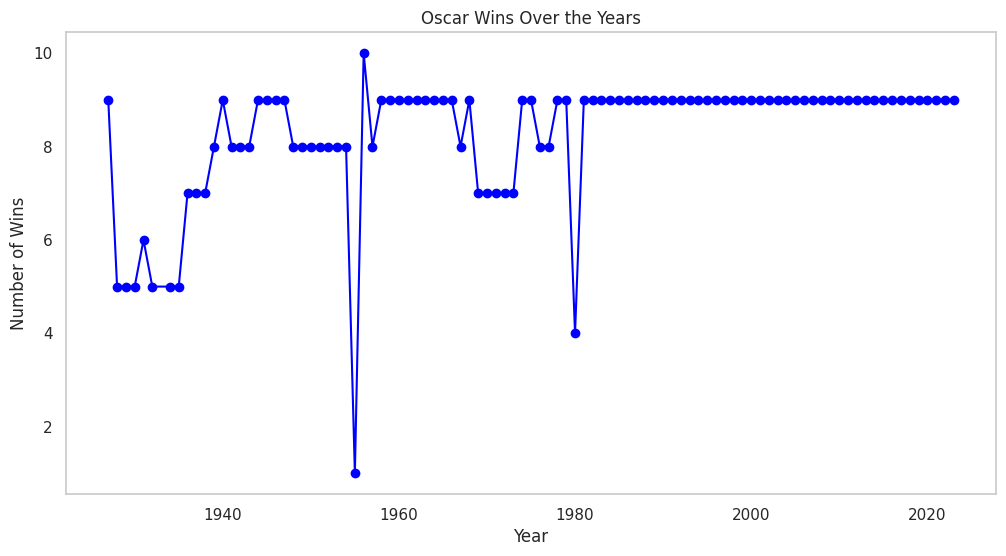

In [ ]:
# 2. Oscar Wins Over the Years

plt.figure(figsize=(12, 6))
df[df['Winner'] == True]['Year'].value_counts().sort_index().plot(kind='line', marker='o', color='blue')
plt.title("Oscar Wins Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Wins")
plt.grid()
plt.show()

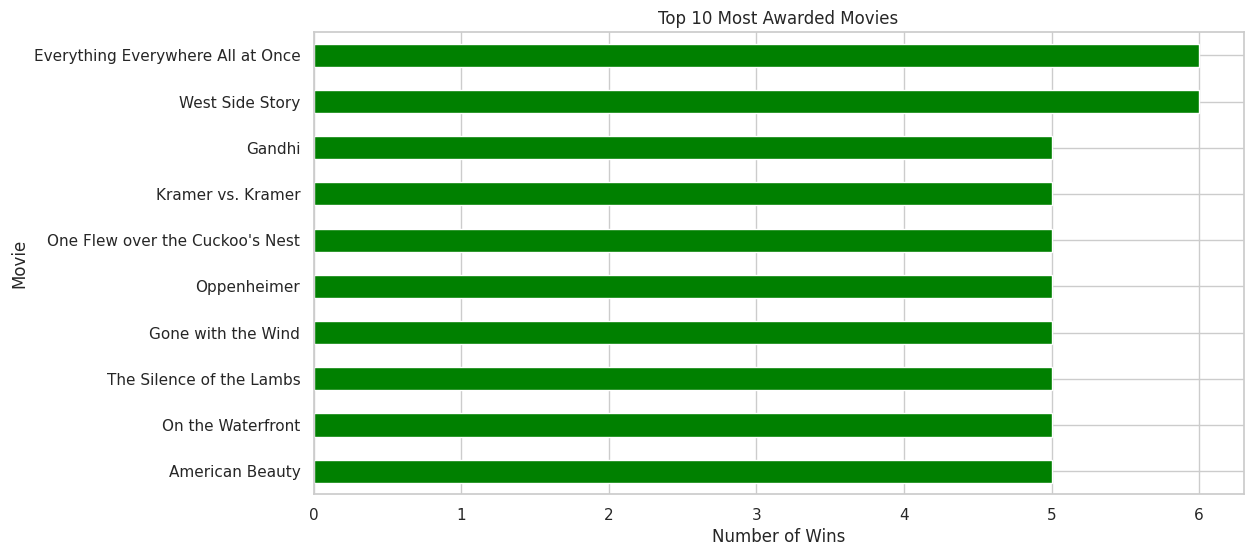

In [ ]:
# 3. Top 10 Most Awarded Movies

plt.figure(figsize=(12, 6))
top_movies = df[df['Winner'] == True]['Film'].value_counts().head(10)
top_movies.plot(kind='barh', color='green')
plt.title("Top 10 Most Awarded Movies")
plt.xlabel("Number of Wins")
plt.ylabel("Movie")
plt.gca().invert_yaxis()
plt.show()

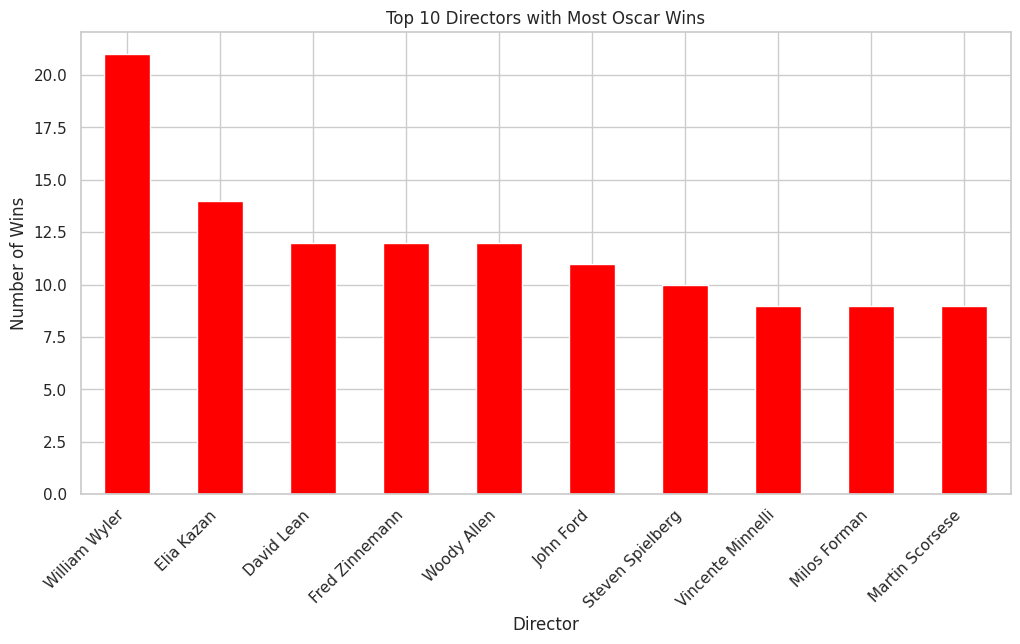

In [ ]:
# 4. Most Awarded Directors (Top 10)

plt.figure(figsize=(12, 6))
top_directors = df[df['Winner'] == True]['Director'].value_counts().head(10)
top_directors.plot(kind='bar', color='red')
plt.title("Top 10 Directors with Most Oscar Wins")
plt.xlabel("Director")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45, ha="right")
plt.show()

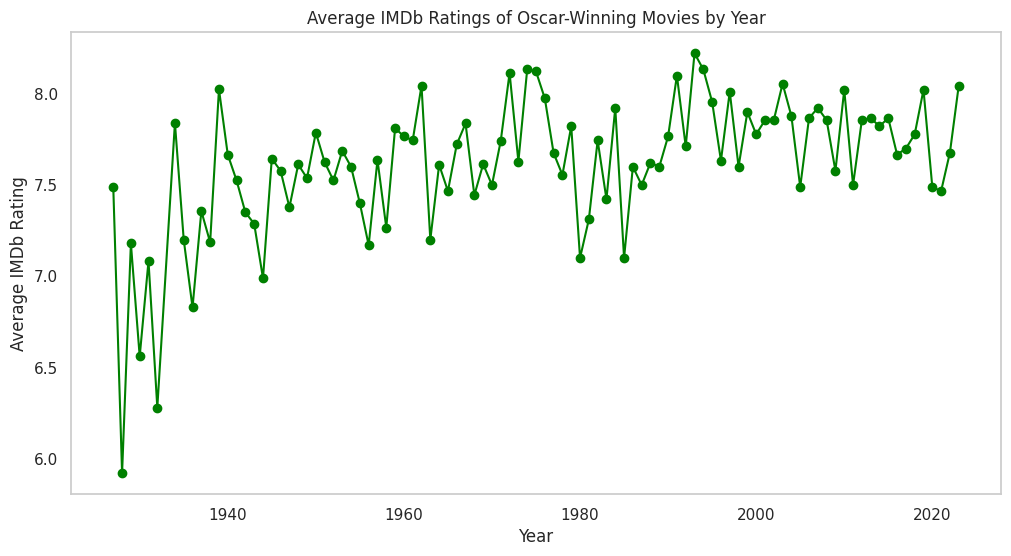

In [ ]:
# 5. Average IMDb Ratings of Oscar-Winning Movies by Year

plt.figure(figsize=(12, 6))
avg_ratings = df[df['Winner'] == True].groupby('Year')['IMDb_Rating'].mean()
plt.plot(avg_ratings.index, avg_ratings.values, marker='o', linestyle='-', color='green')
plt.title("Average IMDb Ratings of Oscar-Winning Movies by Year")
plt.xlabel("Year")
plt.ylabel("Average IMDb Rating")
plt.grid()
plt.show()

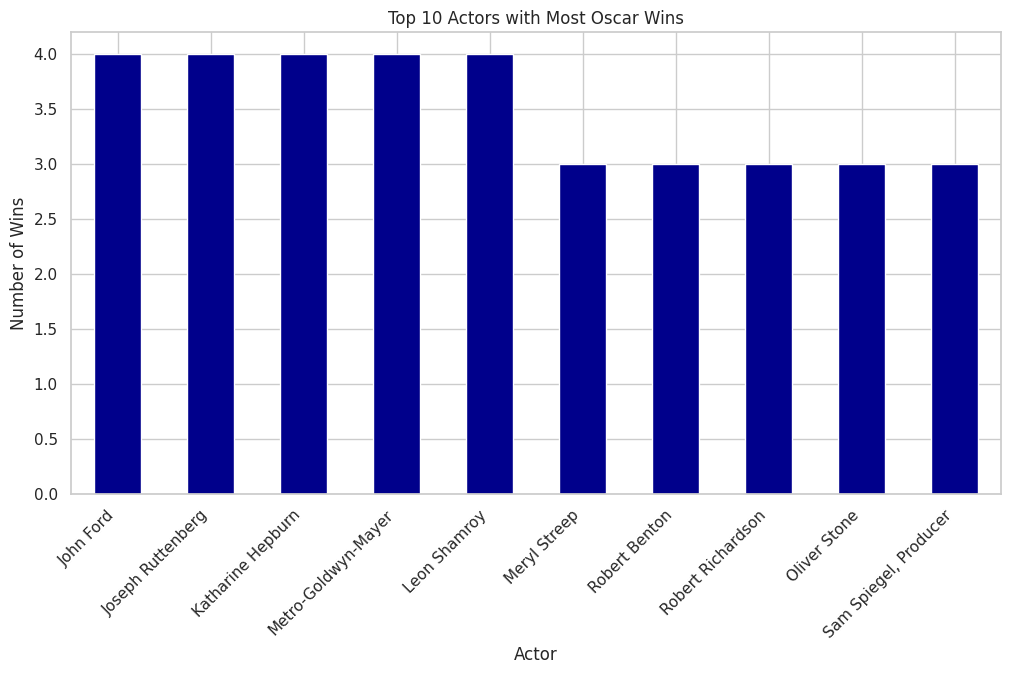

In [ ]:
# 6. Most Awarded Actors (Top 10)

plt.figure(figsize=(12, 6))
top_actors = df[df['Winner'] == True]['Nominee'].value_counts().head(10)
top_actors.plot(kind='bar', color='darkblue')
plt.title("Top 10 Actors with Most Oscar Wins")
plt.xlabel("Actor")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45, ha="right")
plt.show()

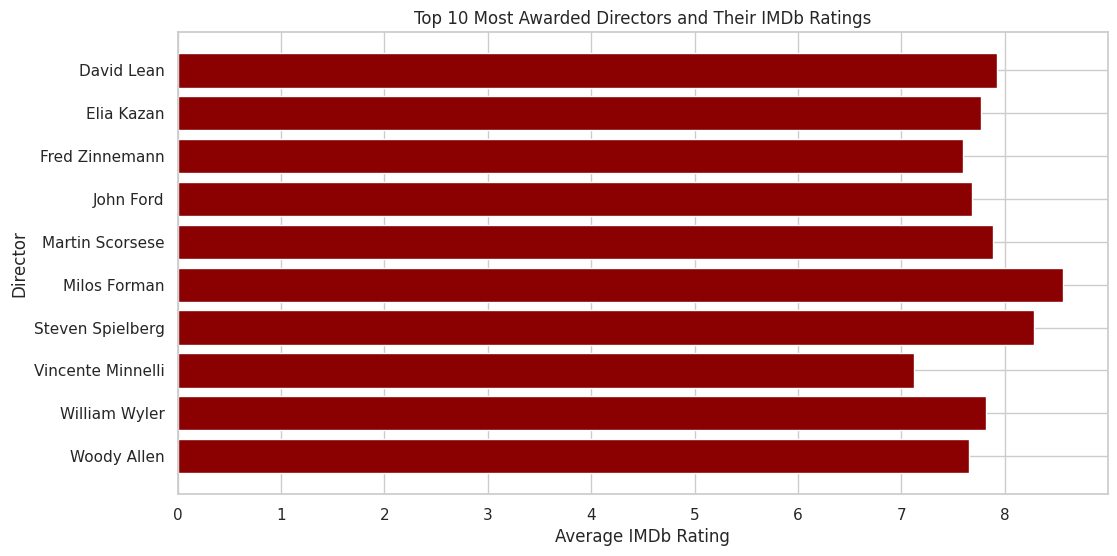

In [ ]:
# 7. Most Awarded Directors vs. Their IMDb Ratings

top_directors = df[df['Winner'] == True]['Director'].value_counts().head(10).index
director_avg_ratings = df[(df['Winner'] == True) & (df['Director'].isin(top_directors))].groupby('Director')['IMDb_Rating'].mean()

# Plot the results
plt.figure(figsize=(12, 6))
plt.barh(director_avg_ratings.index, director_avg_ratings.values, color='darkred')
plt.xlabel("Average IMDb Rating")
plt.ylabel("Director")
plt.title("Top 10 Most Awarded Directors and Their IMDb Ratings")
plt.gca().invert_yaxis()
plt.show()

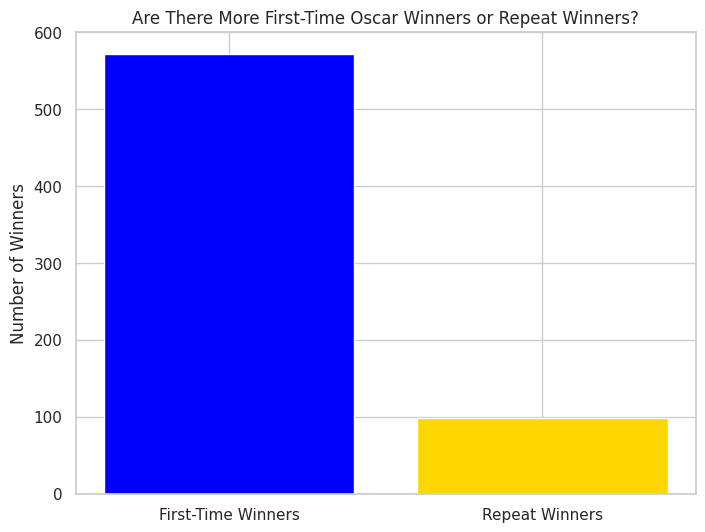

In [ ]:
# 8. Are There More First-Time Oscar Winners or Repeat Winners?

winner_counts = df[df['Winner'] == True]['Nominee'].value_counts()
first_time_winners = (winner_counts == 1).sum()
repeat_winners = (winner_counts > 1).sum()

plt.figure(figsize=(8, 6))
plt.bar(["First-Time Winners", "Repeat Winners"], [first_time_winners, repeat_winners], color=['blue', 'gold'])
plt.title("Are There More First-Time Oscar Winners or Repeat Winners?")
plt.ylabel("Number of Winners")
plt.show()

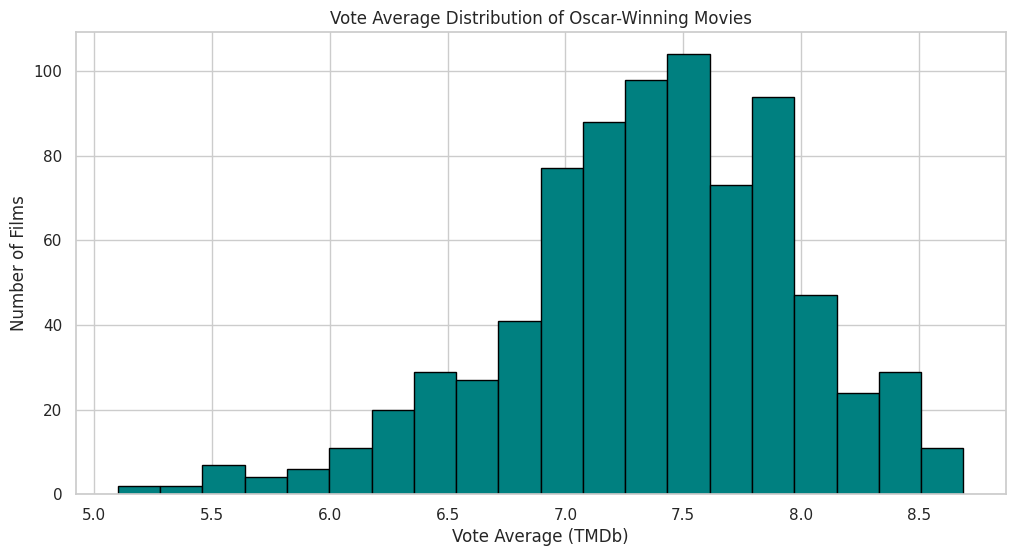

In [ ]:
# 9. Vote Average Distribution of Oscar-Winning Films

plt.figure(figsize=(12, 6))
df[df['Winner'] == True]['Vote_Average'].hist(bins=20, color='teal', edgecolor='black')
plt.title("Vote Average Distribution of Oscar-Winning Movies")
plt.xlabel("Vote Average (TMDb)")
plt.ylabel("Number of Films")
plt.show()

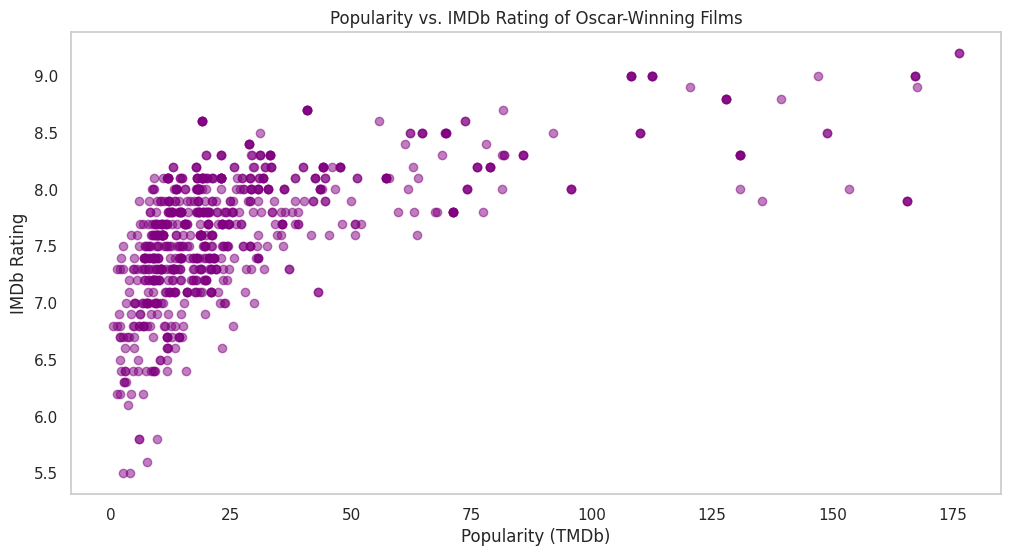

In [ ]:
# 10.Correlation Between Popularity and IMDb Rating for Oscar Winners

plt.figure(figsize=(12, 6))
plt.scatter(df[df['Winner'] == True]['Popularity'], df[df['Winner'] == True]['IMDb_Rating'], alpha=0.5, color='purple')
plt.title("Popularity vs. IMDb Rating of Oscar-Winning Films")
plt.xlabel("Popularity (TMDb)")
plt.ylabel("IMDb Rating")
plt.grid()
plt.show()

# **Principal Component Analysis (PCA)**

## Inspecting the dataset

In [12]:
import pandas as pd

file_path = "final_cleaned_oscars.csv"
df = pd.read_csv(file_path)

df.head()

,Year,Category,Film,Film_ID,Nominee,Winner,TMDb_ID,Popularity,Vote_Count,Vote_Average,Genres,Director,IMDb_Rating
0,1972,Best Cinematography,1776,tt0068156,"Harry Stradling, Jr.",False,14902,6.822,75,6.8,"Drama, History, Musical",Peter H. Hunt,7.2
1,2019,Best Cinematography,1917,tt8579674,Roger Deakins,True,530915,45.996,12542,8.0,"Action, Drama, War",Sam Mendes,8.2
2,2019,Best Director,1917,tt8579674,Sam Mendes,False,530915,45.996,12542,8.0,"Action, Drama, War",Sam Mendes,8.2
3,2019,Best Picture,1917,tt8579674,"Sam Mendes, Pippa Harris, Jayne-Ann Tenggren a...",False,530915,45.996,12542,8.0,"Action, Drama, War",Sam Mendes,8.2
4,2019,Best Original Screenplay,1917,tt8579674,Written by Sam Mendes & Krysty Wilson-Cairns,False,530915,45.996,12542,8.0,"Action, Drama, War",Sam Mendes,8.2


 ## Preprocessing the Data for PCA

In [13]:
numeric_cols = ["Year", "Winner", "Popularity", "Vote_Count", "Vote_Average", "IMDb_Rating"]
df_numeric = df[numeric_cols].dropna()

print(df_numeric.head())

df_numeric.to_csv('PCA_preprocessed.csv', index=False)

   Year  Winner  Popularity  Vote_Count  Vote_Average  IMDb_Rating
0  1972   False       6.822          75           6.8          7.2
1  2019    True      45.996       12542           8.0          8.2
2  2019   False      45.996       12542           8.0          8.2
3  2019   False      45.996       12542           8.0          8.2
4  2019   False      45.996       12542           8.0          8.2


## Normalizing the Data using StandardScaler


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

df_scaled = pd.DataFrame(df_scaled, columns=numeric_cols)

print(df_scaled.head())

df_scaled.to_csv('PCA_normalized.csv', index=False)

       Year    Winner  Popularity  Vote_Count  Vote_Average  IMDb_Rating
0 -0.242253 -0.488742   -0.284831   -0.552694     -0.483343    -0.377077
1  1.451832  2.046069    0.261674    1.974336      1.322624     1.284869
2  1.451832 -0.488742    0.261674    1.974336      1.322624     1.284869
3  1.451832 -0.488742    0.261674    1.974336      1.322624     1.284869
4  1.451832 -0.488742    0.261674    1.974336      1.322624     1.284869


## Performing PCA with 2 Components

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Perform PCA with 2 components

pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(df_scaled)

variance_2d = np.sum(pca_2.explained_variance_ratio_) * 100

print(f"Variance retained in 2D PCA: {variance_2d:.2f}%")

Variance retained in 2D PCA: 63.73%


## Performing PCA with 3 Components

In [ ]:
# Perform PCA with 3 components
pca_3 = PCA(n_components=3)
pca_3_result = pca_3.fit_transform(df_scaled)

variance_3d = np.sum(pca_3.explained_variance_ratio_) * 100
print(f"Variance retained in 3D PCA: {variance_3d:.2f}%")

Variance retained in 3D PCA: 78.11%


## Visualizing the 2D PCA Projection

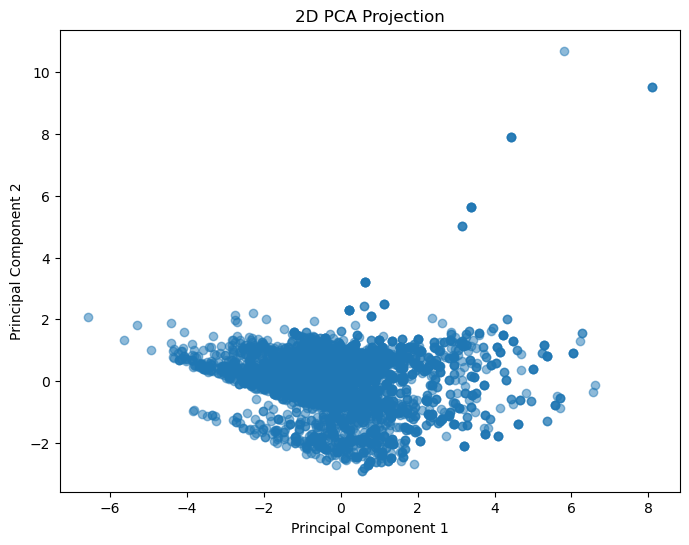

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for 2D PCA
plt.figure(figsize=(8,6))
plt.scatter(pca_2_result[:, 0], pca_2_result[:, 1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection")
plt.show()

## Visualizing the 3D PCA Projection

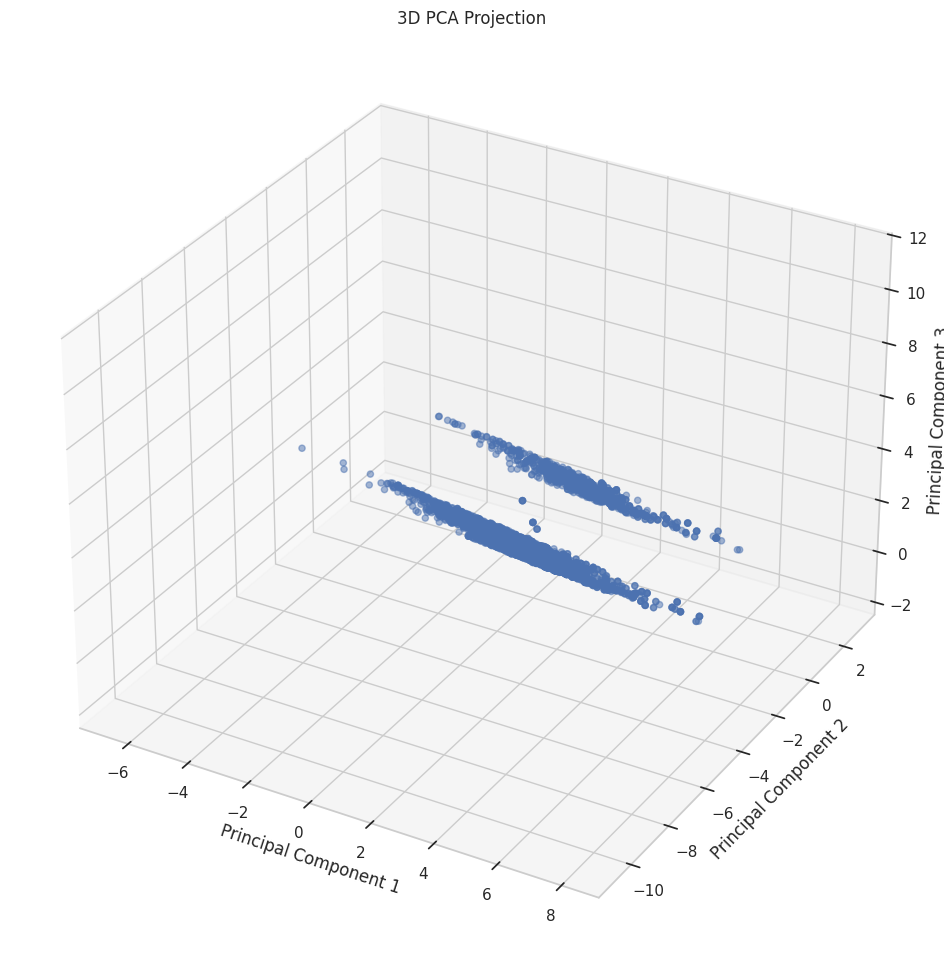

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter plot for PCA
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3_result[:, 0], pca_3_result[:, 1], pca_3_result[:, 2], alpha=0.5)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Projection")
plt.show()

## Number of Components Needed for 95% Variance

In [ ]:
pca_full = PCA().fit(df_scaled)

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components needed to retain at least 95% variance: {n_components_95}")

Number of components needed to retain at least 95% variance: 5


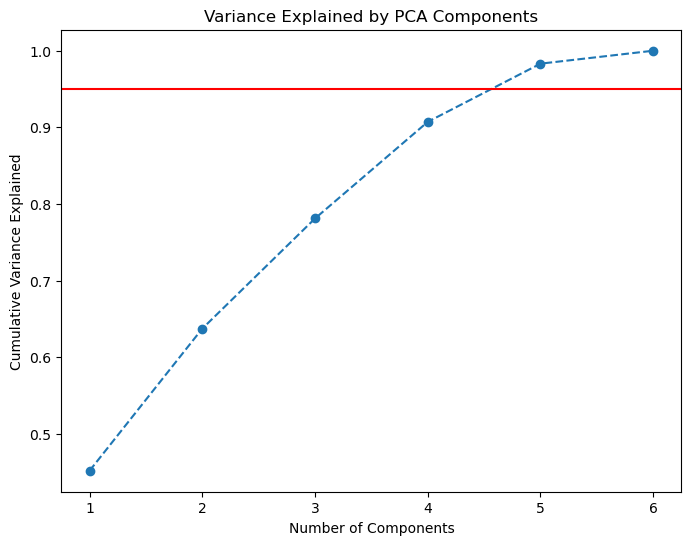

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Variance Explained by PCA Components")
plt.show()

## Extracting the Top Three Eigenvalues

In [ ]:
eigenvalues = pca_full.explained_variance_

top_3_eigenvalues = eigenvalues[:3]

print(f"Top 3 eigenvalues: {top_3_eigenvalues}")

Top 3 eigenvalues: [2.71194946 1.11306933 0.86255365]


# **Clustering**

## Loading and Preparing the Data

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

file_path = "final_cleaned_oscars.csv"
df = pd.read_csv(file_path)

numeric_cols = ["Year", "Popularity", "Vote_Count", "Vote_Average", "IMDb_Rating"]
df_numeric = df[numeric_cols].dropna()

labels = df["Winner"] if "Winner" in df else None

print(df_numeric.head())
df_numeric.to_csv('Clustering_preprocessed.csv', index=False)

   Year  Popularity  Vote_Count  Vote_Average  IMDb_Rating
0  1972       6.822          75           6.8          7.2
1  2019      45.996       12542           8.0          8.2
2  2019      45.996       12542           8.0          8.2
3  2019      45.996       12542           8.0          8.2
4  2019      45.996       12542           8.0          8.2


## Normalizing the Data

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

df_scaled = pd.DataFrame(df_scaled, columns=numeric_cols)

print(df_scaled.head())
df_scaled.to_csv('Clustering_normalized.csv', index=False)

       Year  Popularity  Vote_Count  Vote_Average  IMDb_Rating
0 -0.242253   -0.284831   -0.552694     -0.483343    -0.377077
1  1.451832    0.261674    1.974336      1.322624     1.284869
2  1.451832    0.261674    1.974336      1.322624     1.284869
3  1.451832    0.261674    1.974336      1.322624     1.284869
4  1.451832    0.261674    1.974336      1.322624     1.284869


## PCA for Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2", "PC3"])

variance_retained = np.sum(pca.explained_variance_ratio_) * 100
print(f"Variance retained after PCA reduction to 3D: {variance_retained:.2f}%")

print(df_pca.head())
df_pca.to_csv('Clustering_PCA.csv', index=False)

Variance retained after PCA reduction to 3D: 88.83%
        PC1       PC2       PC3
0 -0.890460 -0.042729 -0.037609
1  2.920955  0.158855 -0.821640
2  2.920955  0.158855 -0.821640
3  2.920955  0.158855 -0.821640
4  2.920955  0.158855 -0.821640


## K-Means Clustering with Silhouette Analysis

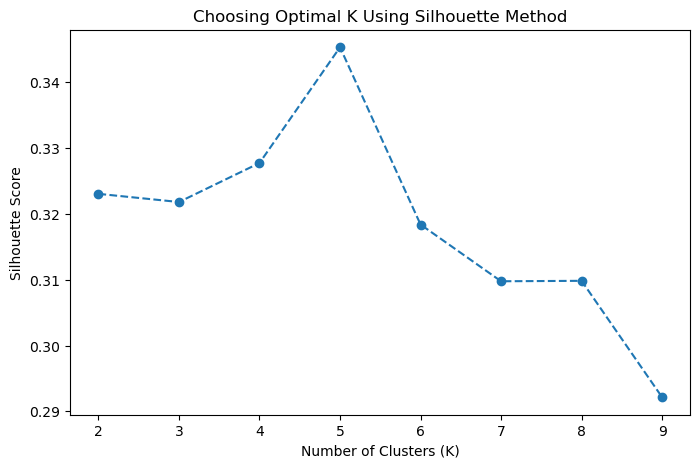

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

range_k = range(2, 10)
silhouette_scores = []

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, cluster_labels))

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range_k, silhouette_scores, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Choosing Optimal K Using Silhouette Method")
plt.show()

## K-Means with Best K and Visualize

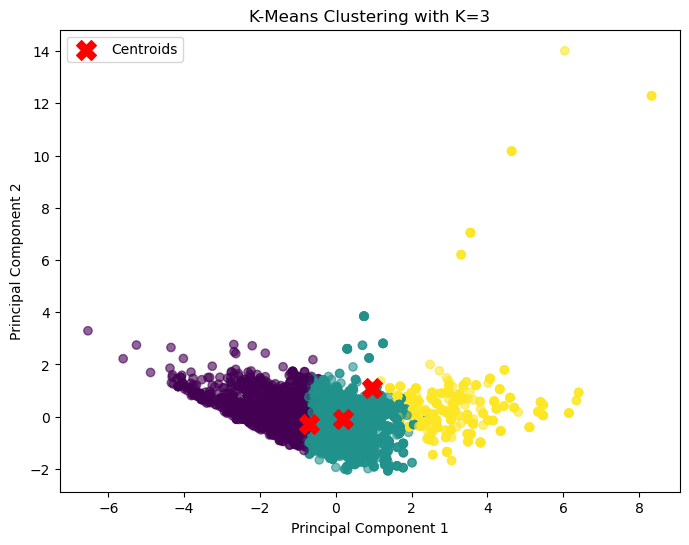

In [ ]:
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_pca["Cluster"] = kmeans.fit_predict(df_scaled)

# Plot K-Means Clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["Cluster"], cmap="viridis", alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroids")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"K-Means Clustering with K={best_k}")
plt.legend()
plt.show()

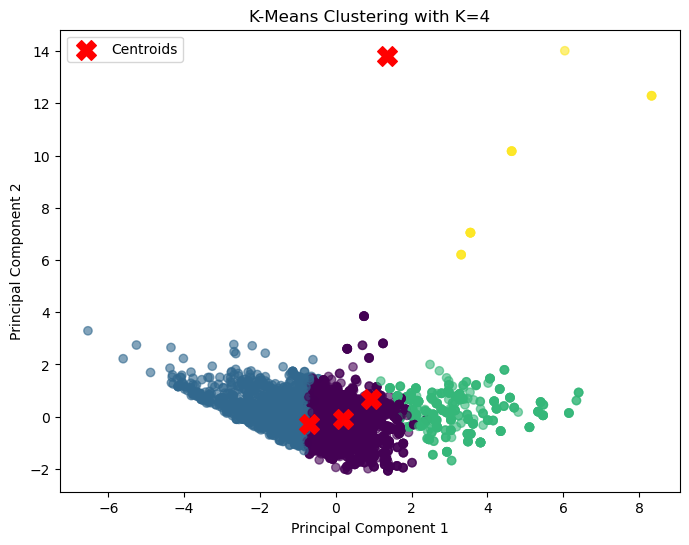

In [ ]:
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_pca["Cluster"] = kmeans.fit_predict(df_scaled)

# Plot K-Means Clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["Cluster"], cmap="viridis", alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroids")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"K-Means Clustering with K={best_k}")
plt.legend()
plt.show()

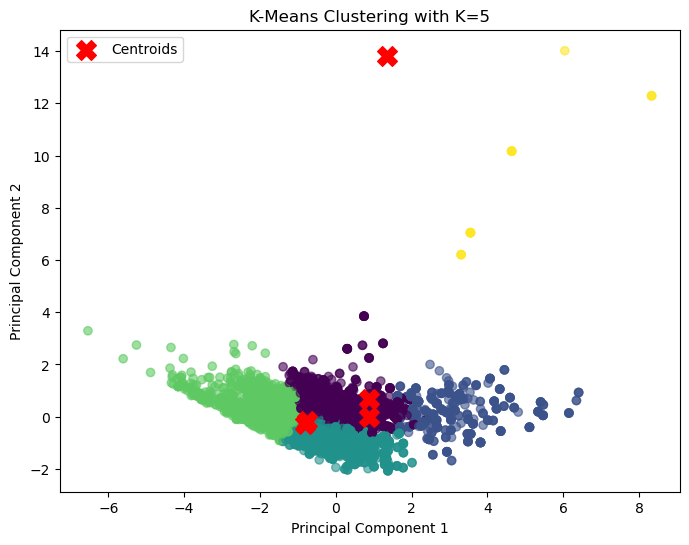

In [ ]:
best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_pca["Cluster"] = kmeans.fit_predict(df_scaled)

# Plot K-Means Clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["Cluster"], cmap="viridis", alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroids")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"K-Means Clustering with K={best_k}")
plt.legend()
plt.show()

## Hierarchical Clustering and Dendrogram

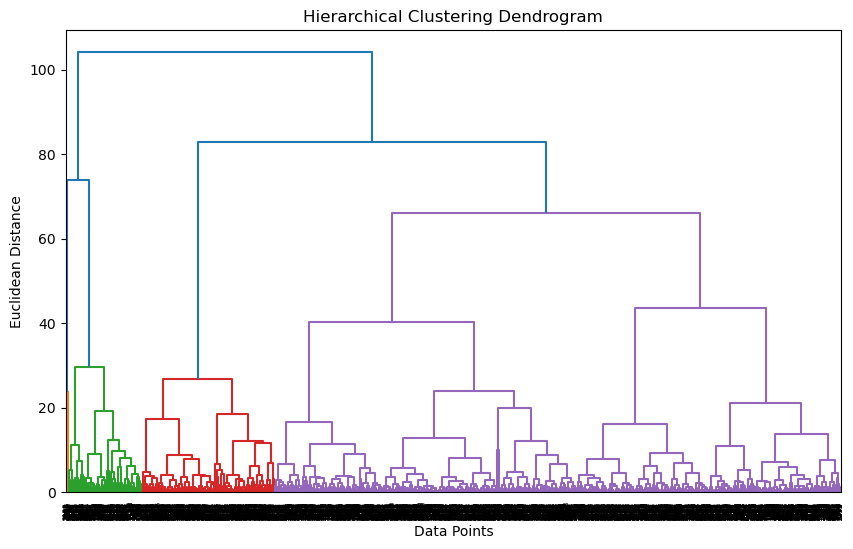

In [ ]:
import scipy.cluster.hierarchy as sch

# Generate a dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method="ward"))
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

## DBSCAN Clustering

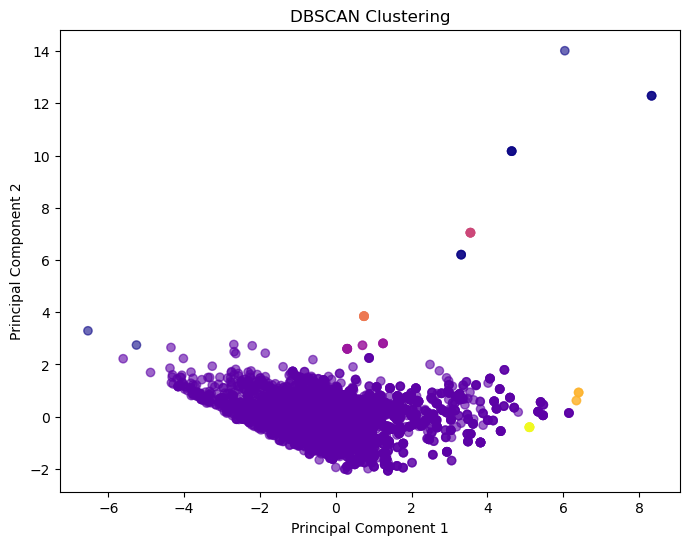

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.0, min_samples=5)
df_pca["DBSCAN_Cluster"] = dbscan.fit_predict(df_pca)

# Plot DBSCAN Clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["DBSCAN_Cluster"], cmap="plasma", alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("DBSCAN Clustering")
plt.show()

## Comparing Clustering Results

In [ ]:
print(f"K-Means Cluster Counts: {df_pca['Cluster'].value_counts().to_dict()}")
print(f"DBSCAN Cluster Counts (including noise points as -1): {df_pca['DBSCAN_Cluster'].value_counts().to_dict()}")

K-Means Cluster Counts: {1: 2368, 0: 1281, 2: 469}
DBSCAN Cluster Counts (including noise points as -1): {0: 4070, 1: 13, -1: 13, 3: 6, 5: 6, 2: 5, 4: 5}


# **ARM**

## Loading and Preparing the dataset

In [3]:
!pip install mlxtend

  Using cached mlxtend-0.23.4-py3-none-any.whl (1.4 MB)
  Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.0
    Uninstalling scikit-learn-1.2.0:
      Successfully uninstalled scikit-learn-1.2.0


In [4]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

file_path = "final_cleaned_oscars.csv"
df = pd.read_csv(file_path)

print(df.head())

   Year                  Category  Film    Film_ID  \
0  1972       Best Cinematography  1776  tt0068156   
1  2019       Best Cinematography  1917  tt8579674   
2  2019             Best Director  1917  tt8579674   
3  2019              Best Picture  1917  tt8579674   
4  2019  Best Original Screenplay  1917  tt8579674   

                                             Nominee  Winner  TMDb_ID  \
0                               Harry Stradling, Jr.   False    14902   
1                                      Roger Deakins    True   530915   
2                                         Sam Mendes   False   530915   
3  Sam Mendes, Pippa Harris, Jayne-Ann Tenggren a...   False   530915   
4       Written by Sam Mendes & Krysty Wilson-Cairns   False   530915   

   Popularity  Vote_Count  Vote_Average                   Genres  \
0       6.822          75           6.8  Drama, History, Musical   
1      45.996       12542           8.0       Action, Drama, War   
2      45.996       12542       

## Converting Data into Transaction Format

In [5]:
df_transactions = df.groupby("Film_ID")["Category"].apply(list).reset_index()
transactions = df_transactions["Category"].tolist()

print(transactions[:5])

[['Best Cinematography'], ['Best Cinematography'], ['Best Actor'], ['Best Actress', 'Best Director', 'Best Picture'], ['Best Actress']]


## Encoding Transaction Data

In [6]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

print(df_encoded.head())
df_encoded.to_csv('ARM_encoded.csv', index=False) 

   Best Actor  Best Actress  Best Adapted Screenplay  Best Cinematography  \
0       False         False                    False                 True   
1       False         False                    False                 True   
2        True         False                    False                False   
3       False          True                    False                False   
4       False          True                    False                False   

   Best Director  Best Original Screenplay  Best Picture  \
0          False                     False         False   
1          False                     False         False   
2          False                     False         False   
3           True                     False          True   
4          False                     False         False   

   Best Supporting Actor  Best Supporting Actress  
0                  False                    False  
1                  False                    False  
2                  F

## Applying Apriori Algorithm

In [7]:
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
print(frequent_itemsets.head())

    support                   itemsets
0  0.253158               (Best Actor)
1  0.260297             (Best Actress)
2  0.135640  (Best Adapted Screenplay)
3  0.349259      (Best Cinematography)
4  0.259198            (Best Director)


## Generating Association Rules

In [8]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print(rules.head())
rules.to_csv('ARM_rules.csv', index=False) 

                 antecedents                consequents  antecedent support  \
0  (Best Adapted Screenplay)               (Best Actor)            0.135640   
1               (Best Actor)  (Best Adapted Screenplay)            0.253158   
2            (Best Director)               (Best Actor)            0.259198   
3               (Best Actor)            (Best Director)            0.253158   
4             (Best Picture)               (Best Actor)            0.314662   

   consequent support   support  confidence      lift  representativity  \
0            0.253158  0.046129    0.340081  1.343357               1.0   
1            0.135640  0.046129    0.182213  1.343357               1.0   
2            0.253158  0.112576    0.434322  1.715619               1.0   
3            0.259198  0.112576    0.444685  1.715619               1.0   
4            0.253158  0.132894    0.422339  1.668283               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  


 ## Top 15 Rules by Support

In [9]:
top_15_support = rules.nlargest(15, "support")
print("Top 15 Rules by Support:\n", top_15_support)

top_15_support.to_csv('top_15_support.csv', index=False) 

Top 15 Rules by Support:
                        antecedents              consequents  \
30                 (Best Director)           (Best Picture)   
31                  (Best Picture)          (Best Director)   
26                  (Best Picture)    (Best Cinematography)   
27           (Best Cinematography)           (Best Picture)   
4                   (Best Picture)             (Best Actor)   
5                     (Best Actor)           (Best Picture)   
24                 (Best Director)    (Best Cinematography)   
25           (Best Cinematography)          (Best Director)   
2                  (Best Director)             (Best Actor)   
3                     (Best Actor)          (Best Director)   
40                  (Best Picture)  (Best Supporting Actor)   
41         (Best Supporting Actor)           (Best Picture)   
134  (Best Director, Best Picture)             (Best Actor)   
135    (Best Director, Best Actor)           (Best Picture)   
136     (Best Picture, Best A

## Top 15 Rules by Confidence

In [10]:
top_15_confidence = rules.nlargest(15, "confidence")
print("Top 15 Rules by Confidence:\n", top_15_confidence)

top_15_confidence.to_csv('top_15_confidence.csv', index=False)

Top 15 Rules by Confidence:
                                             antecedents      consequents  \
1170  (Best Director, Best Adapted Screenplay, Best ...   (Best Picture)   
1467  (Best Director, Best Adapted Screenplay, Best ...   (Best Picture)   
1496  (Best Director, Best Adapted Screenplay, Best ...   (Best Picture)   
1526  (Best Director, Best Adapted Screenplay, Best ...   (Best Picture)   
1770  (Best Supporting Actor, Best Supporting Actres...  (Best Director)   
1800  (Best Supporting Actor, Best Supporting Actres...  (Best Director)   
1917  (Best Director, Best Adapted Screenplay, Best ...   (Best Picture)   
1946  (Best Director, Best Adapted Screenplay, Best ...   (Best Picture)   
2071  (Best Actor, Best Supporting Actor, Best Suppo...  (Best Director)   
1184  (Best Director, Best Adapted Screenplay, Best ...   (Best Picture)   
2040  (Best Supporting Actor, Best Picture, Best Sup...  (Best Director)   
572   (Best Adapted Screenplay, Best Cinematography,...   (

## Top 15 Rules by Lift

In [11]:
top_15_lift = rules.nlargest(15, "lift")
print("Top 15 Rules by Lift:\n", top_15_lift)

top_15_lift.to_csv('top_15_lift.csv', index=False)

Top 15 Rules by Lift:
                                             antecedents  \
2095  (Best Director, Best Supporting Actress, Best ...   
2098  (Best Supporting Actor, Best Picture, Best Actor)   
1779  (Best Supporting Actress, Best Original Screen...   
1782             (Best Director, Best Supporting Actor)   
2050  (Best Picture, Best Supporting Actress, Best O...   
2051             (Best Director, Best Supporting Actor)   
2106  (Best Picture, Best Supporting Actress, Best C...   
2087  (Best Director, Best Supporting Actor, Best Ac...   
2108             (Best Director, Best Supporting Actor)   
2085  (Best Picture, Best Supporting Actress, Best C...   
2109           (Best Director, Best Supporting Actress)   
2084  (Best Cinematography, Best Supporting Actor, B...   
2103  (Best Supporting Actor, Best Supporting Actres...   
2090   (Best Director, Best Cinematography, Best Actor)   
1778  (Best Supporting Actor, Best Original Screenpl...   

                                

## Visualizing Association Rules as a Network Graph

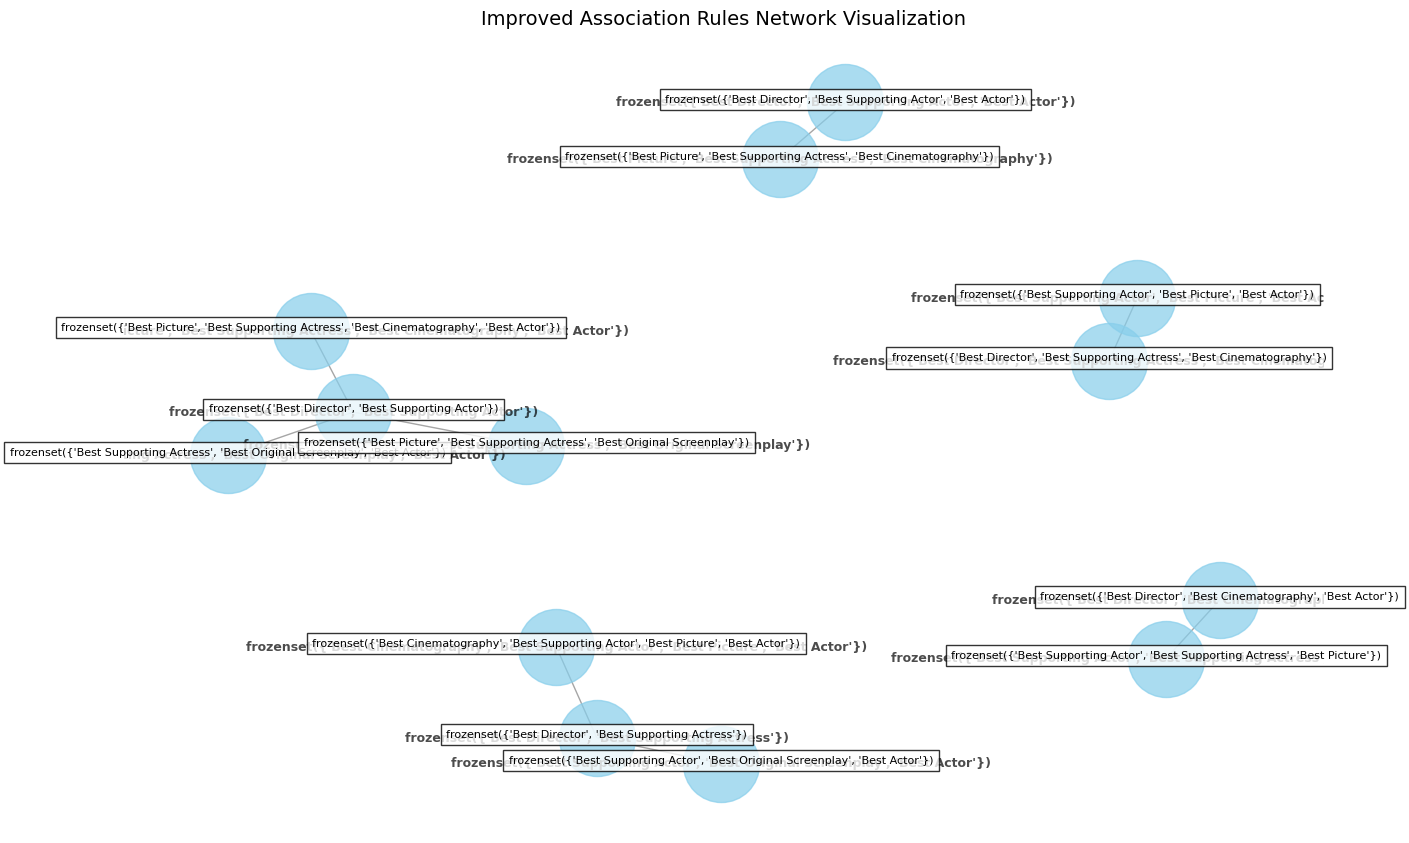

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_pandas_edgelist(rules.nlargest(15, 'lift'), 'antecedents', 'consequents')

plt.figure(figsize=(12, 8))  

pos = nx.spring_layout(G, k=0.5)  

nx.draw(
    G, pos, with_labels=True, node_color='skyblue', edge_color='gray',
    font_size=9, font_weight='bold', node_size=3000, alpha=0.7
)

for node, (x, y) in pos.items():
    plt.text(x, y, s=node, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'),
             horizontalalignment='center', fontsize=8)

plt.title("Improved Association Rules Network Visualization", fontsize=14)
plt.show()